In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
!pip install nlp
!pip install alibi-detect
!pip install -U sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import numpy as np
import pandas as pd

# Import package related files

In [4]:
!pip install -r /content/gdrive/MyDrive/DFCI/TestingPackage/NaturallyDrifted/requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
import sys
sys.path.insert(0,'/content/gdrive/My Drive/DFCI/TestingPackage/NaturallyDrifted/src/alibiDetectors') # very important

In [6]:
from fileImports import imports 
samplingData, basicDetectors, onlineDetectors, contextDetectors, alibiDetectors = imports.run()

# Data 1: COVID Tweets

In [7]:
!unzip gdrive/My\ Drive/Corona_NLP2.zip

Archive:  gdrive/My Drive/Corona_NLP2.zip
  inflating: Covid-19 Twitter Dataset (Apr-Jun 2020).csv  
  inflating: Covid-19 Twitter Dataset (Aug-Sep 2020).csv  


In [8]:
features = ['created_at', 'original_text', 'sentiment']
data1 = pd.read_csv("Covid-19 Twitter Dataset (Apr-Jun 2020).csv", encoding = 'ISO-8859-1')[features]
data2 = pd.read_csv("Covid-19 Twitter Dataset (Aug-Sep 2020).csv", encoding = 'ISO-8859-1')[features]

data1 = data1[data1['sentiment'] != 'neu']
data2 = data2[data2['sentiment'] != 'neu']

data1['sentiment'] = data1['sentiment'].replace('pos', 1)
data1['sentiment'] = data1['sentiment'].replace('neg', 0)


data2['sentiment'] = data2['sentiment'].replace('pos', 1)
data2['sentiment'] = data2['sentiment'].replace('neg', 0)

data1 = np.array(data1)
X1 = np.array([i[1] for i in data1])

data2 = np.array(data2)
X2 = np.array([i[1] for i in data2])

print("X1 length:", len(X1))
print("X2 length:", len(X2))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


X1 length: 147892
X2 length: 191581


## Define Parameters


In [7]:
# data sampling related parameters
sample_size = 200

# embedding related parameters
SBERT_model = 'bert-base-uncased'

# drift detection general parameters
test = "all"
drift_type = "Gradual"
windows = 10
context = None

# alibi's generic detector parameters 
emb_type = 'hidden_state'
n_layers = 8
max_len = 100
enc_dim = 32 # for uae
tokenizer_size = 3
batch_size = 32

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. 

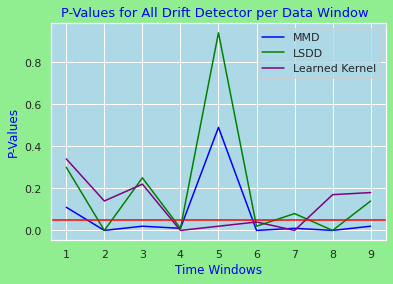

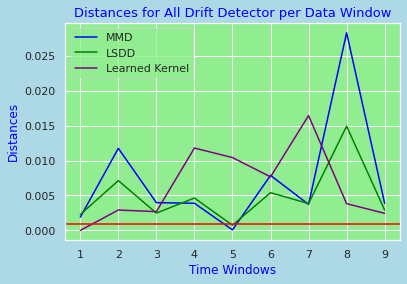

In [15]:
detector = alibiDetectors(data_ref = X1, data_h0 = X1, data_h1 = X2, sample_size = sample_size, windows = windows,
                    SBERT_model = SBERT_model, 
                    test = test,  drift_type = drift_type,  plot = True,                                 
                    emb_type = emb_type, n_layers = n_layers, max_len = max_len,
                    enc_dim = enc_dim, tokenizer_size = tokenizer_size, batch_size = batch_size)
detector.run()

# Data 2: Vaccine Tweets
[Dataset source](https://www.kaggle.com/datasets/gpreda/all-covid19-vaccines-tweets)

In [16]:
!unzip gdrive/My\ Drive/covidvaccines.zip

Archive:  gdrive/My Drive/covidvaccines.zip
  inflating: vaccination_all_tweets.csv  
  inflating: __MACOSX/._vaccination_all_tweets.csv  


In [17]:
data = pd.read_csv("vaccination_all_tweets.csv")
X1 = np.array(data[:len(data)//5]['text'])
X2 = np.array(data[len(data)//5:]['text'])

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. 

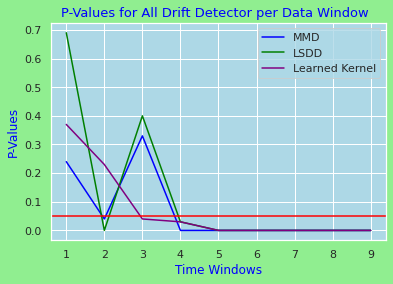

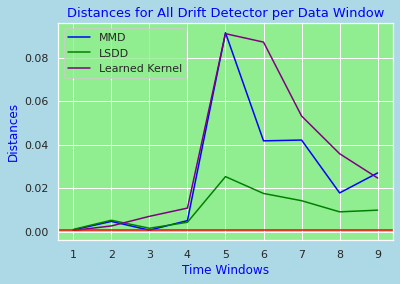

In [18]:
drift_type = "Gradual"
windows = 10

detector = alibiDetectors(data_ref = X1, data_h0 = X1, data_h1 = X2, sample_size = sample_size, windows = windows,
                    SBERT_model = SBERT_model,
                    test = test,  drift_type = drift_type,  plot = True,                                 
                    emb_type = emb_type, n_layers = n_layers, max_len = max_len,
                    enc_dim = enc_dim, tokenizer_size = tokenizer_size, batch_size = batch_size)
detector.run()

# Data 3: Spotify Reviews

In [8]:
!unzip gdrive/My\ Drive/spotifyReviews.zip

Archive:  gdrive/My Drive/spotifyReviews.zip
  inflating: spotifyReviews.csv      
  inflating: __MACOSX/._spotifyReviews.csv  


In [9]:
data = pd.read_csv("spotifyReviews.csv")
data = data.iloc[::-1]
X1 = np.array(data[:5000]['Review'])
X2 = np.array(data[5000:]['Review'])
print("length of X1", len(X1))
print("length of X2", len(X2))

length of X1 5000
length of X2 56594


Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. 

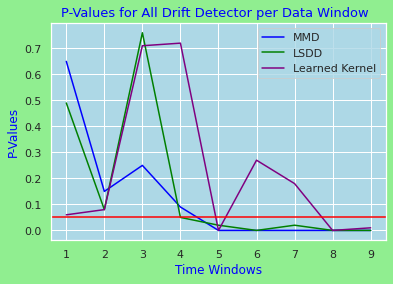

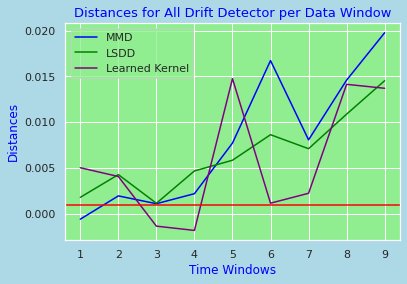

In [10]:
detector = alibiDetectors(data_ref = X1, data_h0 = X1, data_h1 = X2, sample_size = sample_size, windows = windows,
                    SBERT_model = SBERT_model,
                    test = test,  drift_type = drift_type,  plot = True,                                 
                    emb_type = emb_type, n_layers = n_layers, max_len = max_len,
                    enc_dim = enc_dim, tokenizer_size = tokenizer_size, batch_size = batch_size)

detector.run()

# Data 4: Medical Text
[Dataset Source](https://www.kaggle.com/datasets/chaitanyakck/medical-text)

In [11]:
!unzip gdrive/My\ Drive/MedicalText.zip

Archive:  gdrive/My Drive/MedicalText.zip
  inflating: test.dat                
  inflating: train.dat               


In [12]:
data1 = np.genfromtxt('train.dat' , delimiter='\t', dtype=str)
data2 = np.genfromtxt('test.dat' , delimiter='\t', dtype=str)

X1 = [x[1] for x in data1]
X2 = [x[1] for x in data2]

print("length of X1", len(X1))
print("length of X1", len(X2))

length of X1 14438
length of X1 14442


Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. 

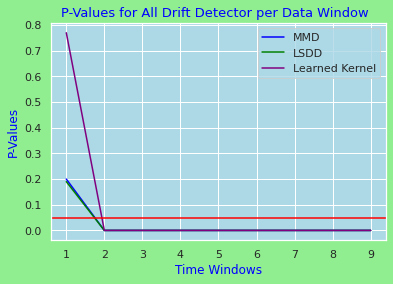

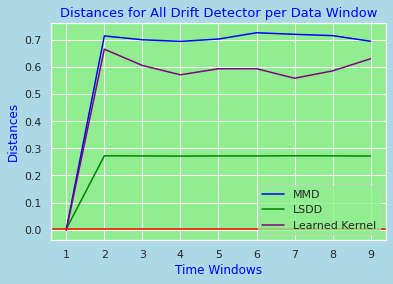

In [13]:
ab = alibiDetectors(data_ref = X1, data_h0 = X1, data_h1 = X2, sample_size = sample_size, windows = windows,
                    SBERT_model = SBERT_model,
                    test = test,  drift_type = drift_type,  plot = True,                                 
                    emb_type = emb_type, n_layers = n_layers, max_len = max_len,
                    enc_dim = enc_dim, tokenizer_size = tokenizer_size, batch_size = batch_size)

ab.run()